## Regresión logística 

El clasificador de regresion logistica, se utilixa para problemas bicalses y en donde las clases son linealmente separables. Sus prestaciones se pueden extender a problemas multiclase a través de la técnica *one vs rest* u OvR. este clasificador parte de la probabilidad a favor de un determinado evento, definida por la *razon de momios*



1. Función para clases linealmente separables 

2. Problemas binarios o biclase: One vs REst (OvR. Extiende los problemas multiclases existen dos clases. clase control y clase de caso)

### Razón de momios
Definicion: "odds ratio" que tan favorecido esta un evento

Funcion: 

$${OR}=\frac{p}{1-p},$$

donde $p$ es la probabilidad del evento.

Al OR le podemos calcular el logaritmo para obtener la función **logit**

$$logit(p)=\log\frac{p}{1-p}$$

En términos de los parametros de entrada de nuestro calsificador tendremos:

$$logit(p)=logit(p(y=1|\mathbf{x}))=w_0x_0+w_1x_1+\dots+w_{1-p}x_{1-p}=\sum_{i=0}^{1-p}w_ix_i=\mathbf{w}^{\top}\mathbf{x}$$

lo que queremos hace es depejar la probabilidad del evento, que se va a relacionar con la probabilidad de que una observación pertenezca a la clase con etiqueta $y=1$. Para ella utilizamos la función inversa, que se denomina **sigmoide**

$$\phi(z)=\frac{1}{1+e^{-z}}$$

Graficamente tendremos:

In [4]:
import matplotlib.pyplot as plt #libreria para graficar
import numpy as np #libreria numérica

# definimos la funcion sigmoide
def sigmoide(z):
    funcion_sigmoide = 1.0/(1.0 + np.exp(-z))
    return funcion_sigmoide

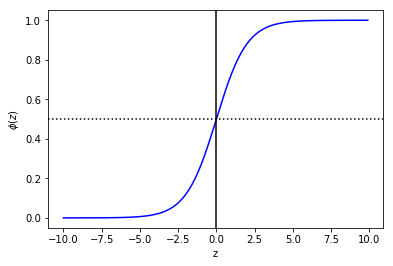

In [5]:
# para probarla necesitamos un vector de entrada que es Z
z = np.mgrid[-10:10:0.1] #declaramos un arreglo tipo mesh grid
fi = sigmoide(z)

# para la gráfica
plt.plot(z,fi,color='b')
plt.axvline(0,0,color='k') #trazamos una linea verical por (0,0) de color negro
plt.axhline(y=0.5,ls='dotted',color='k') #linea horizaontal por 0.5, punteada y de color negro
plt.ylabel('$\phi(z)$')
plt.xlabel('z')
plt.show()


# Base de datos (Iris)

la base de datos Iris es muy utilizada para probar los algoritmos de ML.
Consiste en 150 observaciones y 3 clases (50 observaciones por clases). Las tres clases son las siguientes: *Iris Setosa*, *Iris Versicolor*, *Iris Virginica*. Cada Observación tiene 4 caracteristicas: largo y ancho del sépalo y el largo y ancho del pétalo.

![Iris](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c5/P%C3%A9talo-s%C3%A9palo.jpg/220px-P%C3%A9talo-s%C3%A9palo.jpg)

In [2]:
# Para cargar la base de datos
from sklearn import datasets
from sklearn.linear_model import LogisticRegression   #Importa las fxn de validacion cruzadas
from sklearn.cross_validation import train_test_split #Importa las funciones de validación cruzada
from sklearn.preprocessing import StandardScaler      #Importar las funciones de preparacion 

C:\Users\USUARIO\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
iris = datasets.load_iris()   #Se carga la base de datos
X = iris.data[:,[2,3]]        #La matriz de datos (solo se toman 2 carac. para la visualización)
y = iris.target               #las etiquetas
print(np.unique(y))

[0 1 2]


# Remocion de la media 

In [38]:
#hacemos la división del conjunto de entrenamiento y el conjunto de validación

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3, random_state = 0)

#Remoción para x_train
def Remocion(X):
    med = X.mean(axis=0)
    des = X.std(axis=0)
    X = X - med
    X = X/des
    return X,med, des

#Remocion para x_test
def Remocion_test(X,med,des):
    X = X - med
    X = X/des
    return X


#nomralizacion de x_train
x_norm_train,t_train_mean,t_train_desv = Remocion(X_train)
#Normalizacion para x_test
x_norm_test = Remocion_test(X_test,t_train_mean,t_train_desv)

#Entrenamos el clasificador
clasificador = LogisticRegression(C=0.1,random_state=0) # C es el parametro
clasificador.fit(x_norm_train, y_train) # entrenamiento del clasificador

# para validar el clasificador
y_pred = clasificador.predict(x_norm_test)
#numero de muestras mal clasificadas
print('Las muestras bien clasificadas fueron de %d '%(y_test == y_pred).sum())

Las muestras bien clasificadas fueron de 27 


# Binarización

In [39]:
#hacemos la división del conjunto de entrenamiento y el conjunto de validación
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3, random_state = 0)

# Binarización para la X_train
def Binarizacion(X,gama):
    filas = np.shape(X)[0]
    columnas = np.shape(X)[1]
    for i in range(filas):
        for j in range(columnas):
            if (X[i][j] >= gama):
                X[i][j] = 1
            else:
                X[i][j] = 0
    return X

# Para gama
# tomar el maximo y el minimo de x_train 
min_x_train = X_train.min()
max_x_train = X_train.max()

Gama = (min_x_train+max_x_train)/2

#Binarizacion para X_train
x_bin_train = Binarizacion(X_train,Gama)
#Binarizacion para x_test
x_bin_test = Binarizacion(X_test,Gama)

#Entrenamos el clasificador
clasificador = LogisticRegression(C=0.1,random_state=0) # C es el parametro
clasificador.fit(x_bin_train, y_train) # entrenamiento del clasificador

# para validar el clasificador
y_pred = clasificador.predict(x_bin_test)
#numero de muestras mal clasificadas
print('Las muestras bien clasificadas fueron de %d '%(y_test == y_pred).sum())

Las muestras bien clasificadas fueron de 27 


# Escalamiento


In [61]:
#hacemos la división del conjunto de entrenamiento y el conjunto de validación
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3, random_state = 0)

# Binarización para la X_train

def Escalamiento(X):
    X = X - X.min(axis=0)
    X = X/(X.max(axis=0) - X.min(axis=0))
    return X
    

#Binarizacion para X_train
x_esc_train = Escalamiento(X_train)
#Binarizacion para x_test
x_esc_test = Escalamiento(X_test)

#Entrenamos el clasificador
clasificador = LogisticRegression(C=100.0,random_state=0) # C es el parametro
clasificador.fit(x_esc_train, y_train) # entrenamiento del clasificador

# para validar el clasificador
y_pred = clasificador.predict(x_esc_test)
#numero de muestras mal clasificadas
print('Las muestras bien clasificadas fueron de %d '%(y_test == y_pred).sum())

Las muestras bien clasificadas fueron de 43 


# Normalización L1

In [55]:
#hacemos la división del conjunto de entrenamiento y el conjunto de validación
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3, random_state = 0)

 
# Normalización L_1 para la X_train

def Normal1(X):
    Y = np.linalg.norm(X,ord=1,axis=1)  
    filas = np.shape(X)[0]
    columnas = np.shape(X)[1]
    for i in range(filas):
        for j in range(columnas):
            X[i][j] = X[i][j] / Y[i] 
    return X

    

#Normalización L_1 para X_train
x_norm1_train = Normal1(X_train)
#Normalización L_1 para x_test
x_norm1_test = Normal1(X_test)

#Entrenamos el clasificador
clasificador = LogisticRegression(C=1000.0,random_state=0) # C es el parametro
clasificador.fit(x_norm1_train, y_train) # entrenamiento del clasificador

# para validar el clasificador
y_pred = clasificador.predict(x_norm1_test)
#numero de muestras mal clasificadas
print('Las muestras bien clasificadas fueron de %d '%(y_test == y_pred).sum())

Las muestras bien clasificadas fueron de 29 


# Normalización L 2

In [67]:
#hacemos la división del conjunto de entrenamiento y el conjunto de validación
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3, random_state = 0)

 
# Normalización L_2 para la X_train

def Normal2(X):
    Y = np.linalg.norm(X,ord=2,axis=1)  
    filas = np.shape(X)[0]
    columnas = np.shape(X)[1]
    for i in range(filas):
        for j in range(columnas):
            X[i][j] = X[i][j] / Y[i] 
    return X

#Normalización L_2 para X_train
x_norm2_train = Normal2(X_train)
#Normalización L_2 para x_test
x_norm2_test = Normal2(X_test)

#Entrenamos el clasificador
clasificador = LogisticRegression(C=10000000.0,random_state=0) # C es el parametro
clasificador.fit(x_norm2_train, y_train) # entrenamiento del clasificador

# para validar el clasificador
y_pred = clasificador.predict(x_norm2_test)
#numero de muestras mal clasificadas
print('Las muestras bien clasificadas fueron de %d '%(y_test == y_pred).sum())

Las muestras bien clasificadas fueron de 36 


# Validación del clasificador

In [58]:
# para validar el clasificador
y_pred = clasificador.predict(x_norm_test)
#numero de muestras mal clasificadas
print('Las muestras mal clasificadas fueron de %d '%(y_test == y_pred).sum())

Las muestras mal clasificadas fueron de 44 


# Visualizar las clasificaciones

In [68]:
# para graficar las muestras
def vizualizar_clasificador(clasificador,X,y):
    #definimos valores maximos y minimos de la malla que vamos a graficar
    min_x,max_x = X[:,0].min()-1.0, X[:,0].max()+1.0
    min_y,max_y = X[:,1].min()-1.0, X[:,1].max()+1.0
    
    #definir el paso de la malla
    paso = 0.01
    
    #definimos la malla
    x_vals,y_vals =np.mgrid[min_x:max_x:paso, min_y:max_y:paso]
    
    #np.c: para concatenar los valores
    #np.ravel: coloca todos los datos de varios arreglos o varias dimensiones en 1 sola
    
    #corremos el clasificador sobre la malla
    resultados = clasificador.predict(np.c_[x_vals.ravel(),y_vals.ravel()])
    # reordenamos la salida para que nos quede en forma de malla
    resultados = resultados.reshape(x_vals.shape)
    
    #creamos la figura 
    plt.figure()
    # Elegimos la paleta de colores(colormap)
    plt.pcolormesh(x_vals,y_vals, resultados, cmap=plt.cm.Set3)
    
    #Ubicamos los puntos a clasificar
    # X[:,0] es la coordenada en el eje x
    # X[:,1] es la coordenada y
    # c(color) define el color (c=etiquetas)
    # s = es el tamaño de la letra(size)
    # edgcolors = define el borde
    # linewidth = define el ancho de las lineas
    # cmap = define el mapa de color
    plt.scatter(X[:,0],X[:,1],c=y,s=75, edgecolors='black',linewidth=1,cmap=plt.cm.rainbow)
    
    #fijamos los limites para los ejes x e y
    plt.xlim(x_vals.min(),x_vals.max())
    plt.ylim(y_vals.min(),y_vals.max())
    
    #Mostramos la grafica
    plt.show()
    

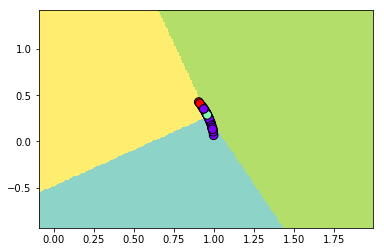

In [69]:
vizualizar_clasificador(clasificador,x_norm2_test,y_test)